# Linear regression - Programming Exercise

### Python Implementation

### Linear regression with one variable

In [1]:
%matplotlib inline
import numpy as np #linear algebra
import matplotlib.pyplot as plt #Data visualization

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss

In [2]:
#load the data
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0][:, np.newaxis] #population
X = np.insert(X,0,1, axis=1) 
y= data[:,1][:, np.newaxis] #profit

### 2.1 Plotting the data

In [3]:
def plotData(X,y):
    plt.figure(figsize= (11,7))
    plt.plot(X[:,1],y,'rx',markersize=10)
    plt.grid()
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')

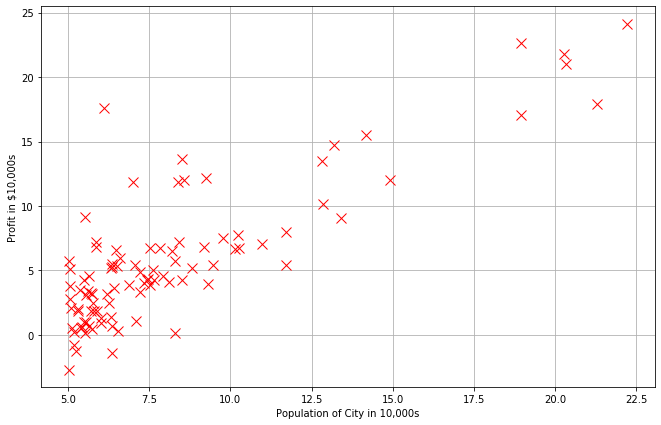

In [4]:
plotData(X,y)

#### 5x5 Identity Matrix:

In [5]:
def warmupExercise():
    return np.identity(5)

In [6]:
warmupExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 2.2.1 Update Equations
 
The objective of linear regression is to minimize the cost function                                                             
                                                                                                                        $J(\Theta) = 1/{2m} \sum ^{}{}^{m}_{i=1} (h_{\Theta}(x)^{(i)} - y^{(i)})^2$

Where the hypothesis  is given by the linear model                                                                              
               $h_\theta(x) = \vec{\theta}^{\top} \vec{x}$


In [7]:
def computeCost(X,y,theta):
    m = y.size
    predictions = X.dot(theta)
    sqerror = (predictions-y)**2
    J = 1/(2*m) * np.sum(sqerror)
    return J

In [8]:
theta1 = np.zeros((2,1))
theta2 = np.array([[-1],[2]])
a = computeCost(X,y,theta1)
b = computeCost(X,y,theta2)
print('The predicted prameters are:' + '\n' + '%0.2f and %0.2f'%(a,b))

The predicted prameters are:
32.07 and 54.24


In batch gradient descent, each iteration performs the update   

\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & 
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j &
\newline \rbrace \end{align*}

In [9]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m = y.size
    J_history =[]
    for _ in range(num_iters):
        errors = X.dot(theta)-y
        delta = np.dot(X.T,errors)
        theta = theta - ((alpha/m)* delta)
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [10]:
theta = np.zeros((2,1))
m=y.size
alpha = 0.01
num_iters = 1500
theta, J_history = gradientDescent(X,y,theta,alpha,num_iters)
print(*theta)
print('h(x) = %0.2f + %0.2fx'%(theta[0,0], theta[1,0]))

[-3.63029144] [1.16636235]
h(x) = -3.63 + 1.17x


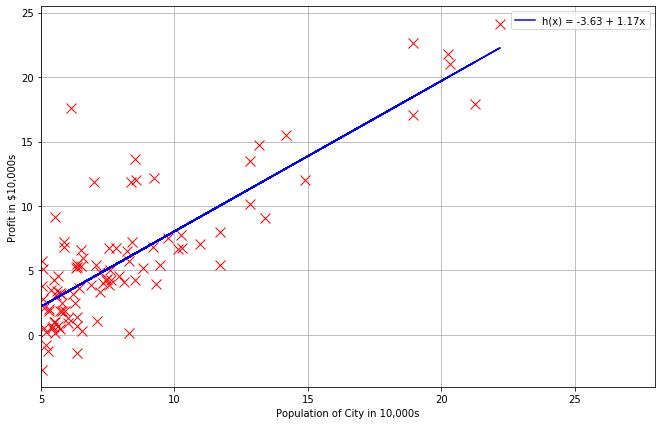

In [11]:
# plotting our hypothesis function
# h(x) = Ө + Ө1X
h = lambda x: theta[0,0] + theta[1,0]*x

plt.figure(figsize= (11,7))
plt.plot(X[:,1],y,'rx',markersize=10)
plt.plot(X[:,1],h(X[:,1]), color='blue', label = 'h(x) = %0.2f + %0.2fx'%(theta[0,0],theta[1,0]))
plt.xlim(5,28)
plt.grid()
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.show()

In [12]:
print('For population = 35,000, we predict a profit of $%0.2f' %(h(35000) *10000))
print('For population = 70,000, we predict a profit of $%0.2f' %(h(70000)*10000))

For population = 35,000, we predict a profit of $408190519.70
For population = 70,000, we predict a profit of $816417342.32


### 2.4 Visualizing J(Ө)

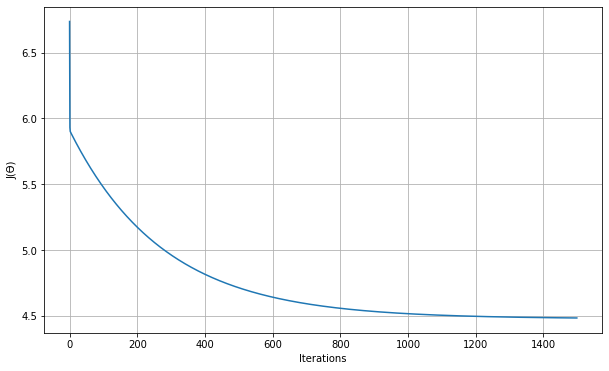

In [13]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('J(Ө)')
plt.grid()
plt.show()

#the cost should decrease with every iteration if the function is working properly

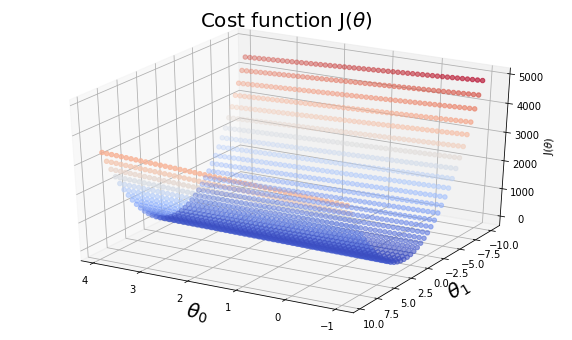

In [14]:
#Visualizing cost function
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

theta_0 = np.arange(-10,10,.5)
theta_1 = np.arange(-1,4,.1)
xs, ys, zs = [], [], []
for i in theta_1:
    for w in theta_0:
        xs.append(i)
        ys.append(w)
        zs.append(computeCost(X,y,np.array([[i], [w]])))

scat = ax.scatter(xs,ys,zs,c=np.abs(zs),cmap=plt.get_cmap('coolwarm'))

ax.set_xlabel(r'$\theta_0$',fontsize=20)
ax.set_ylabel(r'$\theta_1$',fontsize=20)
ax.set_zlabel(r'J($\theta$)')
plt.title(r'Cost function J($\theta$)',fontsize=20)
ax.view_init(30,120)
plt.show()

## Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [15]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, [0,1]]
y = data[:, 2]
X.shape

(47, 2)

### Feature Normalization

Explore the Different features to see the differences in their scaling and to see if we need Feature Normalization.

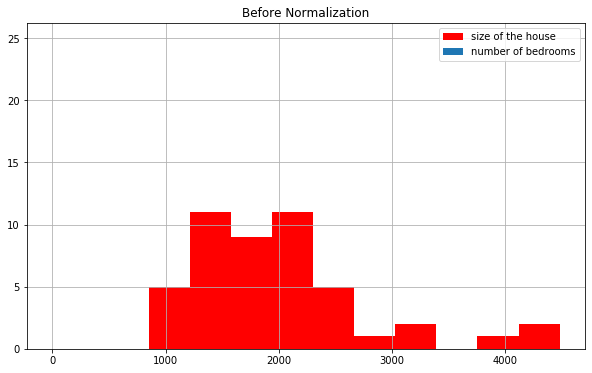

In [16]:
def explore(features, title):
    plt.figure(figsize=(10,6))
    plt.hist(X[:,0], label='size of the house', color ='red')
    plt.hist(X[:,1], label = 'number of bedrooms')
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

explore(X, 'Before Normalization')

The Number of bedrooms is barely visible.
We need feature Normalization. 

Which is given by the formula

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [17]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, ddof=1, axis=0)
    X_norm = (X-mu)/std
    return X_norm, mu, std

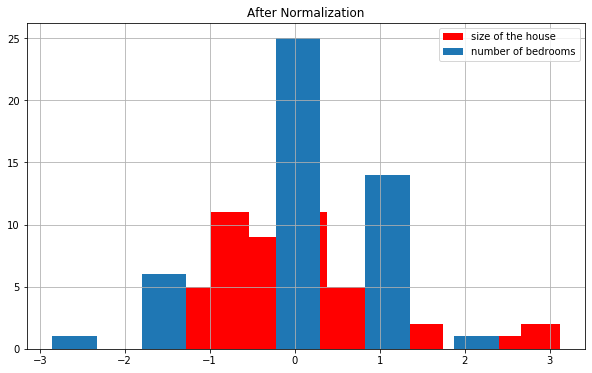

(47, 2)

In [18]:
X,mu,std = featureNormalize(X)
explore(X,'After Normalization')
X.shape

In [19]:
#inserting All ones to the matrix of features
X_train = np.insert(X,0,1, axis=1)
X_train.shape

(47, 3)

In the multivariate case, the cost function can also be written in the following vectorized form:

$J(\Theta) = \frac{1}{2m} (X\Theta - \overrightarrow{y})^T (X\Theta - \overrightarrow{y})$

In [20]:
def computeCostMulti(X,y,theta):
    m = y.size
    predictions = X.dot(theta)
    sqerror = (predictions-y)**2
    J = 1/(2*m) * np.sum(sqerror)
    return J

In batch gradient descent, each iteration performs the update        

\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & 
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j &
\newline \rbrace \end{align*}

In [21]:
def gradientDescentMulti(X,y,theta,alpha,num_iters):
    m = y.size
    J_history =[]
    for _ in range(num_iters):
        errors = X.dot(theta)-y
        delta = np.dot(X.T,errors)
        theta = theta - ((alpha/m)* delta)
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [22]:
theta = np.zeros(3)
alpha = 0.01
num_iters = 400
theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters)
print('The hypothesis takes the form:')
print('h(x) = %0.2f + %0.2f x size of house + %0.2f x bedrooms'%(theta[0], theta[1], theta[2]))

The hypothesis takes the form:
h(x) = 334302.06 + 100087.12 x size of house + 3673.55 x bedrooms


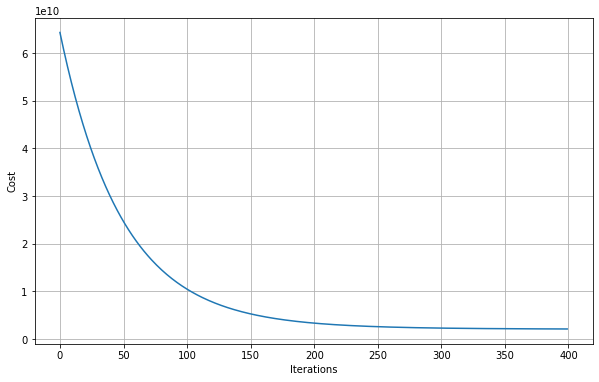

In [23]:
#see if gradient descent is working, J(Ө) should decrease with every iteration
plt.figure(figsize=(10,6))
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid()
plt.show()

In [24]:
print ("What is price of house with 1650 square feet and 3 bedrooms?")

x = [1650,3]
h = lambda x: theta[0] + theta[1]*((x[0]-mu[0])/std[0]) + theta[2] *((x[1] - mu[1])/std[1])
print('The price is $%0.2f' %(h(x)))

What is price of house with 1650 square feet and 3 bedrooms?
The price is $289314.62


##### Analyzing the effect of different learning rates, alpha

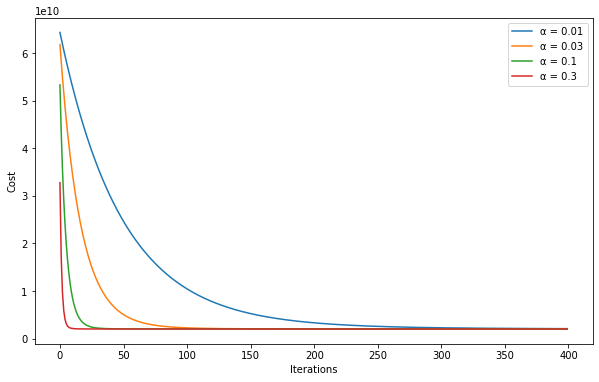

In [25]:
alphas = [0.01, 0.03, 0.1, 0.3]
plt.figure(figsize=(10,6))
for alpha in alphas:
    theta = np.zeros(3)
    num_iters = 400
    theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters)
    plt.plot(np.arange(num_iters), J_history, label=f'α = {alpha}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

### Using the Normal Equation

$\Theta = (X^{T}X)^{-1}X^{T}\vec{y}$

In [26]:
data = np.loadtxt("ex1data2.txt", delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]
X_train = np.insert(X,0,1, axis = 1)
X_train.shape

(47, 3)

In [27]:
from numpy.linalg import pinv

def normalEquation(X,y):
    return np.dot(np.dot(pinv(np.dot(X.T, X)), X.T), y)

theta = normalEquation(X_train,y)
theta

array([89597.90954361,   139.21067402, -8738.01911255])

In [28]:
print("Prediction for price of house with 1650 square feet and 3 bedrooms by the normal equation")
x = np.array([1, 1650, 3])
h = lambda x: x.dot(theta)
theta = normalEquation(X_train,y)
print('The predicted price is $%0.2f'%(h(x)))

Prediction for price of house with 1650 square feet and 3 bedrooms by the normal equation
The predicted price is $293081.46
